In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes datasets

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [3]:
# Save the input and target variables

print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
data.shape, targets.shape

((442, 10), (442,))

In [5]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [6]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [7]:
# Build a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model
model = get_model()

In [8]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [9]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.9997 - mae: 0.8481 - val_loss: 0.9489 - val_mae: 0.8762
Epoch 2/100
337/337 - 0s - loss: 0.9135 - mae: 0.8157 - val_loss: 0.7786 - val_mae: 0.7921
Epoch 3/100
337/337 - 0s - loss: 0.6982 - mae: 0.7087 - val_loss: 0.5440 - val_mae: 0.6146
Epoch 4/100
337/337 - 0s - loss: 0.5819 - mae: 0.6169 - val_loss: 0.4318 - val_mae: 0.5076
Epoch 5/100
337/337 - 0s - loss: 0.5302 - mae: 0.5811 - val_loss: 0.4602 - val_mae: 0.5445
Epoch 6/100
337/337 - 0s - loss: 0.4995 - mae: 0.5822 - val_loss: 0.4385 - val_mae: 0.5286
Epoch 7/100
337/337 - 0s - loss: 0.4806 - mae: 0.5623 - val_loss: 0.4225 - val_mae: 0.5023
Epoch 8/100
337/337 - 0s - loss: 0.4924 - mae: 0.5596 - val_loss: 0.3992 - val_mae: 0.4917
Epoch 9/100
337/337 - 0s - loss: 0.4828 - mae: 0.5714 - val_loss: 0.4164 - val_mae: 0.5134
Epoch 10/100
337/337 - 0s - loss: 0.4842 - mae: 0.5553 - val_loss: 0.4139 - val_mae: 0.5161
Epoch 11/100
337/337 - 0s - loss: 0.4647 - m

Epoch 90/100
337/337 - 0s - loss: 0.0500 - mae: 0.1799 - val_loss: 0.5851 - val_mae: 0.6043
Epoch 91/100
337/337 - 0s - loss: 0.0428 - mae: 0.1571 - val_loss: 0.5589 - val_mae: 0.5876
Epoch 92/100
337/337 - 0s - loss: 0.0360 - mae: 0.1440 - val_loss: 0.5963 - val_mae: 0.6142
Epoch 93/100
337/337 - 0s - loss: 0.0313 - mae: 0.1321 - val_loss: 0.5967 - val_mae: 0.6084
Epoch 94/100
337/337 - 0s - loss: 0.0401 - mae: 0.1547 - val_loss: 0.5942 - val_mae: 0.6197
Epoch 95/100
337/337 - 0s - loss: 0.0413 - mae: 0.1531 - val_loss: 0.5719 - val_mae: 0.5876
Epoch 96/100
337/337 - 0s - loss: 0.0328 - mae: 0.1403 - val_loss: 0.6103 - val_mae: 0.6273
Epoch 97/100
337/337 - 0s - loss: 0.0320 - mae: 0.1381 - val_loss: 0.5844 - val_mae: 0.6001
Epoch 98/100
337/337 - 0s - loss: 0.0272 - mae: 0.1223 - val_loss: 0.5939 - val_mae: 0.6200
Epoch 99/100
337/337 - 0s - loss: 0.0302 - mae: 0.1340 - val_loss: 0.6183 - val_mae: 0.6210
Epoch 100/100
337/337 - 0s - loss: 0.0308 - mae: 0.1361 - val_loss: 0.6031 - val

In [11]:
# Evaluate the model on test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5734 - mae: 0.7018


[0.7672805772887336, 0.7017977]

#### Plot the learning curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

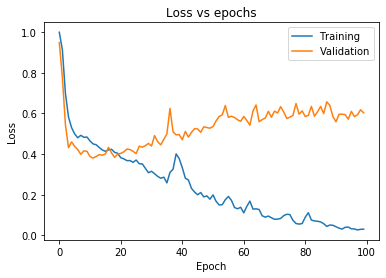

In [13]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [14]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [15]:
def get_regularized_model(wd, rate):
    model = Sequential([
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
            Dropout(rate),
            Dense(1)
        ])
    
    return model

In [16]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [17]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [18]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 1s - loss: 1.0168 - mae: 0.8531 - val_loss: 0.9947 - val_mae: 0.8942
Epoch 2/100
337/337 - 0s - loss: 1.0109 - mae: 0.8513 - val_loss: 0.9816 - val_mae: 0.8887
Epoch 3/100
337/337 - 0s - loss: 0.9893 - mae: 0.8453 - val_loss: 0.9465 - val_mae: 0.8724
Epoch 4/100
337/337 - 0s - loss: 0.9204 - mae: 0.8235 - val_loss: 0.8422 - val_mae: 0.8177
Epoch 5/100
337/337 - 0s - loss: 0.8207 - mae: 0.7826 - val_loss: 0.6196 - val_mae: 0.6991
Epoch 6/100
337/337 - 0s - loss: 0.6850 - mae: 0.6968 - val_loss: 0.4365 - val_mae: 0.5667
Epoch 7/100
337/337 - 0s - loss: 0.6152 - mae: 0.6385 - val_loss: 0.4044 - val_mae: 0.5300
Epoch 8/100
337/337 - 0s - loss: 0.6095 - mae: 0.6314 - val_loss: 0.4101 - val_mae: 0.5292
Epoch 9/100
337/337 - 0s - loss: 0.5891 - mae: 0.6256 - val_loss: 0.4147 - val_mae: 0.5044
Epoch 10/100
337/337 - 0s - loss: 0.5931 - mae: 0.6308 - val_loss: 0.4040 - val_mae: 0.5050
Epoch 11/100
337/337 - 0s - loss: 0.5533 - m

Epoch 90/100
337/337 - 0s - loss: 0.3890 - mae: 0.4953 - val_loss: 0.4581 - val_mae: 0.5061
Epoch 91/100
337/337 - 0s - loss: 0.4202 - mae: 0.5152 - val_loss: 0.4265 - val_mae: 0.4953
Epoch 92/100
337/337 - 0s - loss: 0.3912 - mae: 0.4961 - val_loss: 0.4854 - val_mae: 0.5290
Epoch 93/100
337/337 - 0s - loss: 0.3969 - mae: 0.4980 - val_loss: 0.4858 - val_mae: 0.5461
Epoch 94/100
337/337 - 0s - loss: 0.3940 - mae: 0.4989 - val_loss: 0.5078 - val_mae: 0.5524
Epoch 95/100
337/337 - 0s - loss: 0.3827 - mae: 0.4897 - val_loss: 0.4978 - val_mae: 0.5384
Epoch 96/100
337/337 - 0s - loss: 0.3771 - mae: 0.4850 - val_loss: 0.4503 - val_mae: 0.5136
Epoch 97/100
337/337 - 0s - loss: 0.3931 - mae: 0.5065 - val_loss: 0.4493 - val_mae: 0.5044
Epoch 98/100
337/337 - 0s - loss: 0.3785 - mae: 0.4883 - val_loss: 0.4637 - val_mae: 0.5165
Epoch 99/100
337/337 - 0s - loss: 0.3846 - mae: 0.4839 - val_loss: 0.4876 - val_mae: 0.5263
Epoch 100/100
337/337 - 0s - loss: 0.3933 - mae: 0.4870 - val_loss: 0.4501 - val

In [19]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.3217 - mae: 0.5267


[0.4075713333156374, 0.5267023]

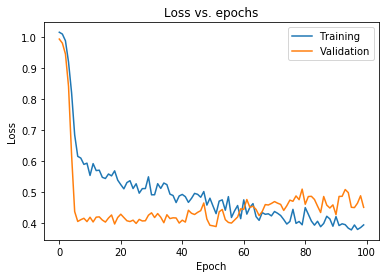

In [20]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [21]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print(f"Starting Training....")
    
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting Epoch {epoch}")
    
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting Batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f'Training Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs=None):
        print(f'Finished epoch {epoch}')
        
    def on_train_end(self, logs=None):
        print('Training Finished...')

In [22]:
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")

In [23]:
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished Prediction!")        

In [24]:
# Rebuild the model

model = get_regularized_model(1e-5, 0.3)

In [25]:
# compile the model

model.compile(optimizer='adam', loss='mae')

#### Train the model with the callback

In [26]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting Training....
Starting Epoch 0
Training: Starting Batch 0
Training Finished batch 0
Training: Starting Batch 1
Training Finished batch 1
Training: Starting Batch 2
Training Finished batch 2
Training: Starting Batch 3
Training Finished batch 3
Finished epoch 0
Starting Epoch 1
Training: Starting Batch 0
Training Finished batch 0
Training: Starting Batch 1
Training Finished batch 1
Training: Starting Batch 2
Training Finished batch 2
Training: Starting Batch 3
Training Finished batch 3
Finished epoch 1
Starting Epoch 2
Training: Starting Batch 0
Training Finished batch 0
Training: Starting Batch 1
Training Finished batch 1
Training: Starting Batch 2
Training Finished batch 2
Training: Starting Batch 3
Training Finished batch 3
Finished epoch 2
Training Finished...


In [27]:
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing Starting batch 0
Testing Finished batch 0
Testing Starting batch 1
Testing Finished batch 1
Finished testing!


0.8114979532029893

In [28]:
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished Prediction!


array([[-0.10230544],
       [-0.12876685],
       [-0.05383684],
       [-0.12186787],
       [-0.1333321 ],
       [-0.11019683],
       [-0.1028384 ],
       [-0.10789131],
       [-0.09258064],
       [-0.10989442],
       [-0.08476475],
       [-0.04930463],
       [-0.10755298],
       [-0.11538202],
       [-0.11150641],
       [-0.13951117],
       [-0.08533153],
       [-0.1064572 ],
       [-0.06514765],
       [-0.07144564],
       [-0.13949154],
       [-0.09270068],
       [-0.11971813],
       [-0.07133152],
       [-0.10651574],
       [-0.14453515],
       [-0.10576595],
       [-0.05645908],
       [-0.05821655],
       [-0.11425278],
       [-0.12339952],
       [-0.06010836],
       [-0.05540754],
       [-0.13725455],
       [-0.04859525],
       [-0.08043445],
       [-0.13058569],
       [-0.06476553],
       [-0.13206829],
       [-0.13942072],
       [-0.06877672],
       [-0.14699633],
       [-0.11719977],
       [-0.09801399],
       [-0.10234651]], dtype=flo